In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("2023_finalized_data.csv") 

positions = ["QB", "TE", "RB", "WR"]
df_filtered = df[df["Position"].isin(positions)].copy()

vif_columns = [
    "Age", "Games Played", "Games Started", "Passing Attempts", "Passing Completions",
    "Passing Yards", "Passing Touchdowns", "Interceptions Thrown", "Rushing Attempts",
    "Rushing Yards", "Rushing Touchdowns", "Targets", "Receptions", "Receiving Yards",
    "Receiving Touchdowns", "Fumbles" , "XP2", "ESPN ADP", "Sleeper ADP", "NFL ADP",
    "RTSports ADP", "Average ADP", "Positional ADP"
]

df_filtered[vif_columns] = df_filtered[vif_columns].fillna(0)

X = df_filtered[vif_columns]
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 Feature         VIF
0                  const  118.158864
1                    Age    1.164473
2           Games Played    1.710114
3          Games Started    4.444757
4       Passing Attempts  693.470012
5    Passing Completions  877.975667
6          Passing Yards  191.559927
7     Passing Touchdowns   38.655529
8   Interceptions Thrown    9.729685
9       Rushing Attempts   34.082915
10         Rushing Yards   36.977921
11    Rushing Touchdowns    3.826369
12               Targets   58.813722
13            Receptions   50.267012
14       Receiving Yards   23.810233
15  Receiving Touchdowns    3.760335
16               Fumbles    3.095820
17                   XP2    1.132329
18              ESPN ADP   27.618346
19           Sleeper ADP   48.266947
20               NFL ADP   19.911253
21          RTSports ADP   33.471765
22           Average ADP   30.868395
23        Positional ADP    2.052287


In [28]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("2023_finalized_data.csv")  
positions = ["QB", "TE", "RB", "WR"]
df_filtered = df[df["Position"].isin(positions)].copy()

df_filtered['new_var'] = df['Passing Yards'] * df['Passing Touchdowns']

vif_columns = [
    "Age", "Games Played", "Games Started",
    'new_var',
    "Interceptions Thrown",
    #"Passing Yards", "Passing Touchdowns", 
    "Rushing Yards", "Rushing Touchdowns", "Receiving Yards",
    "Receiving Touchdowns", "Fumbles" , "XP2", "Average ADP", "Positional ADP"
]

df_filtered[vif_columns] = df_filtered[vif_columns].fillna(0)

X = df_filtered[vif_columns]
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 Feature         VIF
0                  const  105.604248
1                    Age    1.085032
2           Games Played    1.628493
3          Games Started    3.794026
4                new_var    3.619938
5   Interceptions Thrown    4.485465
6          Rushing Yards    4.376797
7     Rushing Touchdowns    3.645864
8        Receiving Yards    5.941153
9   Receiving Touchdowns    3.628130
10               Fumbles    2.427327
11                   XP2    1.079572
12           Average ADP    2.500709
13        Positional ADP    1.471917


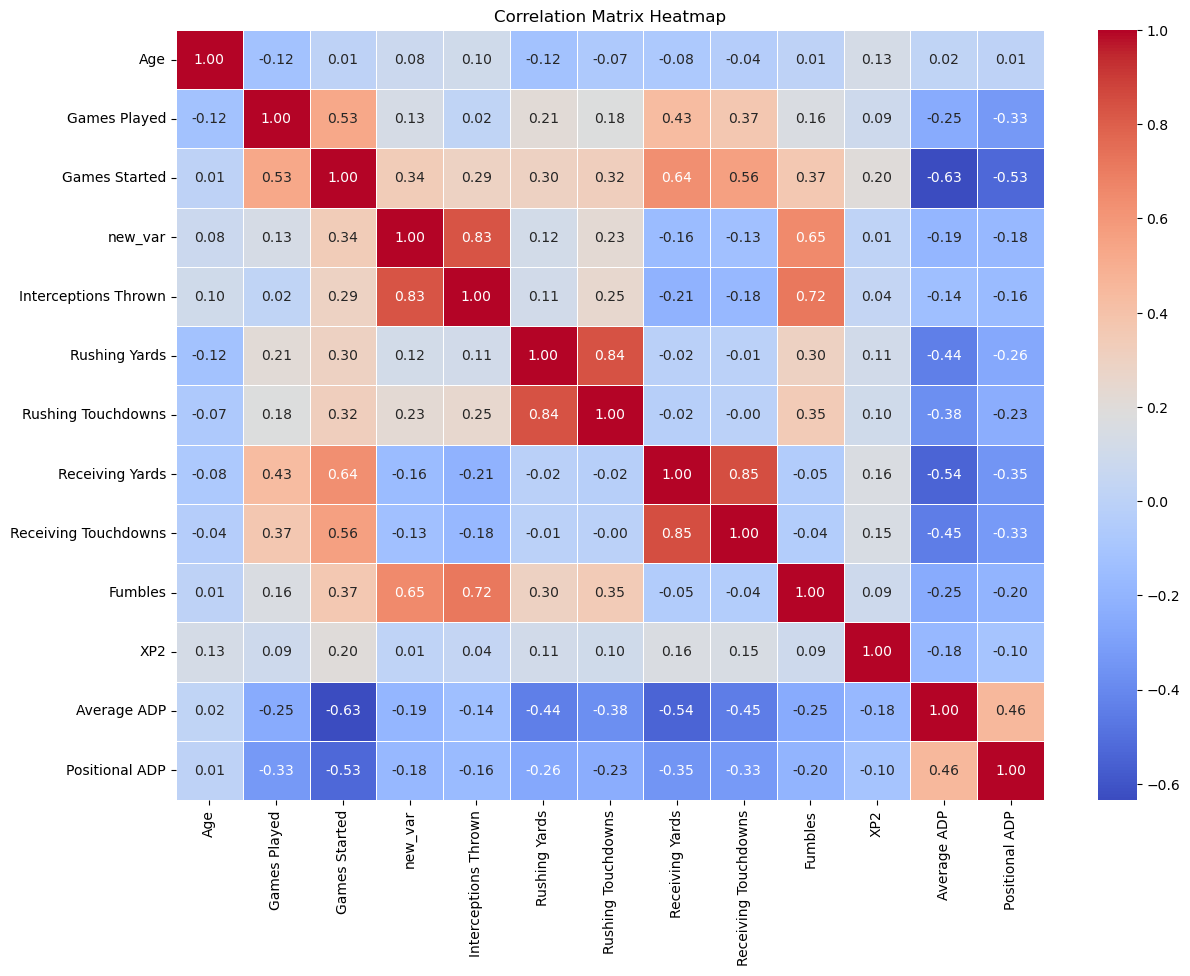

In [29]:
correlation_matrix = df_filtered[vif_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_kickers = df[df["Position"] == "K"].copy()

vif_columns_kickers = [
    "Age", "Games Played", "Games Started", "Field Goals Attempted 0-39",
    "Field Goals Made 0-39", "Field Goals Attempted 40-49", "Field Goals Made 40-49",
    "Field Goals Attempted 50+", "Field Goals Made 50+", "Field Goals Attempted",
    "Field Goals Made", "Extra Points Attempted", "Extra Points Made",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP"
]

df_kickers[vif_columns_kickers] = df_kickers[vif_columns_kickers].fillna(0)

X_kickers = df_kickers[vif_columns_kickers]
X_kickers = sm.add_constant(X_kickers)  

vif_data_kickers = pd.DataFrame()
vif_data_kickers["Feature"] = X_kickers.columns
vif_data_kickers["VIF"] = [variance_inflation_factor(X_kickers.values, i) for i in range(X_kickers.shape[1])]

print(vif_data_kickers)


                        Feature         VIF
0                         const  392.438006
1                           Age    1.699688
2                  Games Played    1.740509
3                 Games Started         NaN
4    Field Goals Attempted 0-39         inf
5         Field Goals Made 0-39         inf
6   Field Goals Attempted 40-49         inf
7        Field Goals Made 40-49         inf
8     Field Goals Attempted 50+         inf
9          Field Goals Made 50+         inf
10        Field Goals Attempted         inf
11             Field Goals Made         inf
12       Extra Points Attempted  872.958950
13            Extra Points Made  936.413885
14                     ESPN ADP   16.970323
15                  Sleeper ADP    9.324737
16                      NFL ADP   13.843743
17                 RTSports ADP   15.937939
18                  Average ADP   27.991736
19               Positional ADP    6.873067


/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_kickers = df[df["Position"] == "K"].copy()

vif_columns_kickers = [
    "Age", "Games Played",
    "Field Goals Made 0-39", "Field Goals Made 40-49", "Field Goals Made 50+", "Extra Points Made", "Average ADP", "Positional ADP"
    
    #"ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP", "Field Goals Attempted"   

]

df_kickers[vif_columns_kickers] = df_kickers[vif_columns_kickers].fillna(0)

X_kickers = df_kickers[vif_columns_kickers]
X_kickers = sm.add_constant(X_kickers)  

vif_data_kickers = pd.DataFrame()
vif_data_kickers["Feature"] = X_kickers.columns
vif_data_kickers["VIF"] = [variance_inflation_factor(X_kickers.values, i) for i in range(X_kickers.shape[1])]

print(vif_data_kickers)


                  Feature         VIF
0                   const  223.579488
1                     Age    1.522366
2            Games Played    1.553010
3   Field Goals Made 0-39    6.604581
4  Field Goals Made 40-49    3.627578
5    Field Goals Made 50+    3.346228
6       Extra Points Made    6.724711
7             Average ADP    3.599751
8          Positional ADP    5.422108


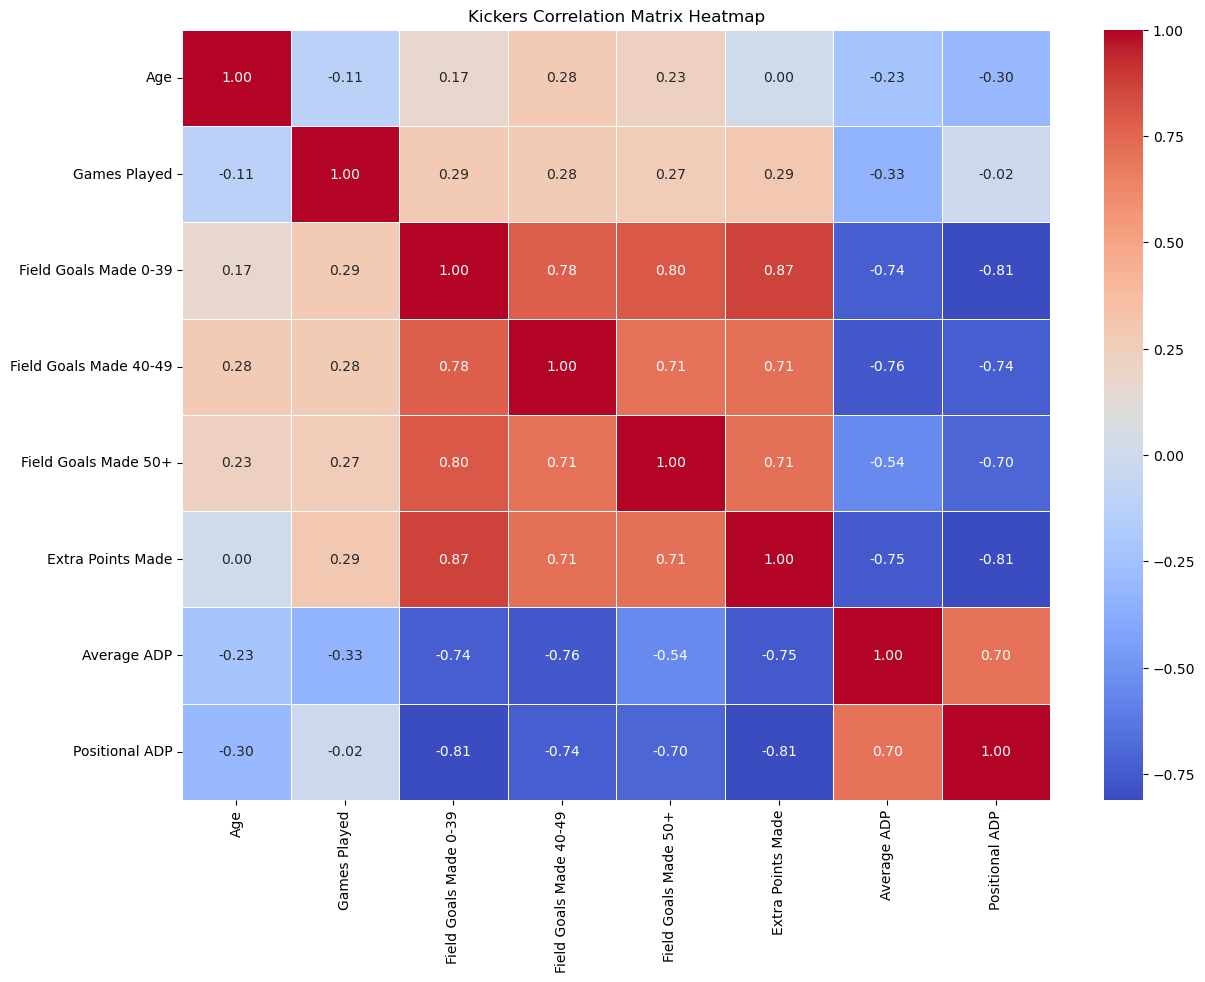

In [32]:
correlation_matrix_kickers = df_kickers[vif_columns_kickers].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_kickers, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Kickers Correlation Matrix Heatmap")
plt.show()


In [33]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_defense = df[df["Position"] == "DEF"].copy()

vif_columns_defense = [
    "Total Yards Allowed", "Total Plays", "Takeaways", "First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", "Penalties Committed", "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", "Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", "Fantasy Points From Points",
    "Average ADP", "Positional ADP"
]

df_defense[vif_columns_defense] = df_defense[vif_columns_defense].fillna(0)

X_defense = df_defense[vif_columns_defense]
X_defense = sm.add_constant(X_defense)  

vif_data_defense = pd.DataFrame()
vif_data_defense["Feature"] = X_defense.columns
vif_data_defense["VIF"] = [variance_inflation_factor(X_defense.values, i) for i in range(X_defense.shape[1])]

print(vif_data_defense)


                        Feature          VIF
0                         const  3609.091150
1           Total Yards Allowed          inf
2                   Total Plays     9.709052
3                     Takeaways  1221.545701
4           First Downs Allowed    45.112603
5         Passing Yards Allowed          inf
6    Passing Touchdowns Allowed    18.682581
7         Rushing Yards Allowed          inf
8    Rushing Touchdowns Allowed    20.462997
9           Penalties Committed    15.405555
10                Penalty Yards    14.902318
11       First Downs by Penalty     2.841467
12     Percent Drives Scored On    21.027913
13      Percent Drives Takeaway    55.169690
14                     ST_Sacks     4.326449
15             ST_Interceptions   764.349058
16         ST_Fumble Recoveries   284.857213
17            ST_Forced Fumbles     4.395839
18                  ST_Safeties     5.110821
19  ST_Special Teams Touchdowns     2.651883
20   Fantasy Points From Points    33.268481
21        

/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns



df_defense = df[df["Position"] == "DEF"].copy()

vif_columns_defense = [
    "Total Plays", 
    #"First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", 
    #"Penalties Committed", 
    "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", 
    #"Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", 
    #"Fantasy Points From Points",
    "Average ADP", 
    "Positional ADP"
]

df_defense[vif_columns_defense] = df_defense[vif_columns_defense].fillna(0)

X_defense = df_defense[vif_columns_defense]
X_defense = sm.add_constant(X_defense)  

vif_data_defense = pd.DataFrame()
vif_data_defense["Feature"] = X_defense.columns
vif_data_defense["VIF"] = [variance_inflation_factor(X_defense.values, i) for i in range(X_defense.shape[1])]

print(vif_data_defense)


                        Feature          VIF
0                         const  2095.493929
1                   Total Plays     2.866071
2         Passing Yards Allowed     6.145570
3    Passing Touchdowns Allowed     2.385295
4         Rushing Yards Allowed     4.203911
5    Rushing Touchdowns Allowed     2.517421
6                 Penalty Yards     1.508617
7        First Downs by Penalty     1.940113
8      Percent Drives Scored On     7.747516
9                      ST_Sacks     2.112799
10             ST_Interceptions     2.487943
11         ST_Fumble Recoveries     4.086303
12            ST_Forced Fumbles     3.391578
13                  ST_Safeties     1.890500
14  ST_Special Teams Touchdowns     2.136293
15                  Average ADP    35.920331
16               Positional ADP    34.009380


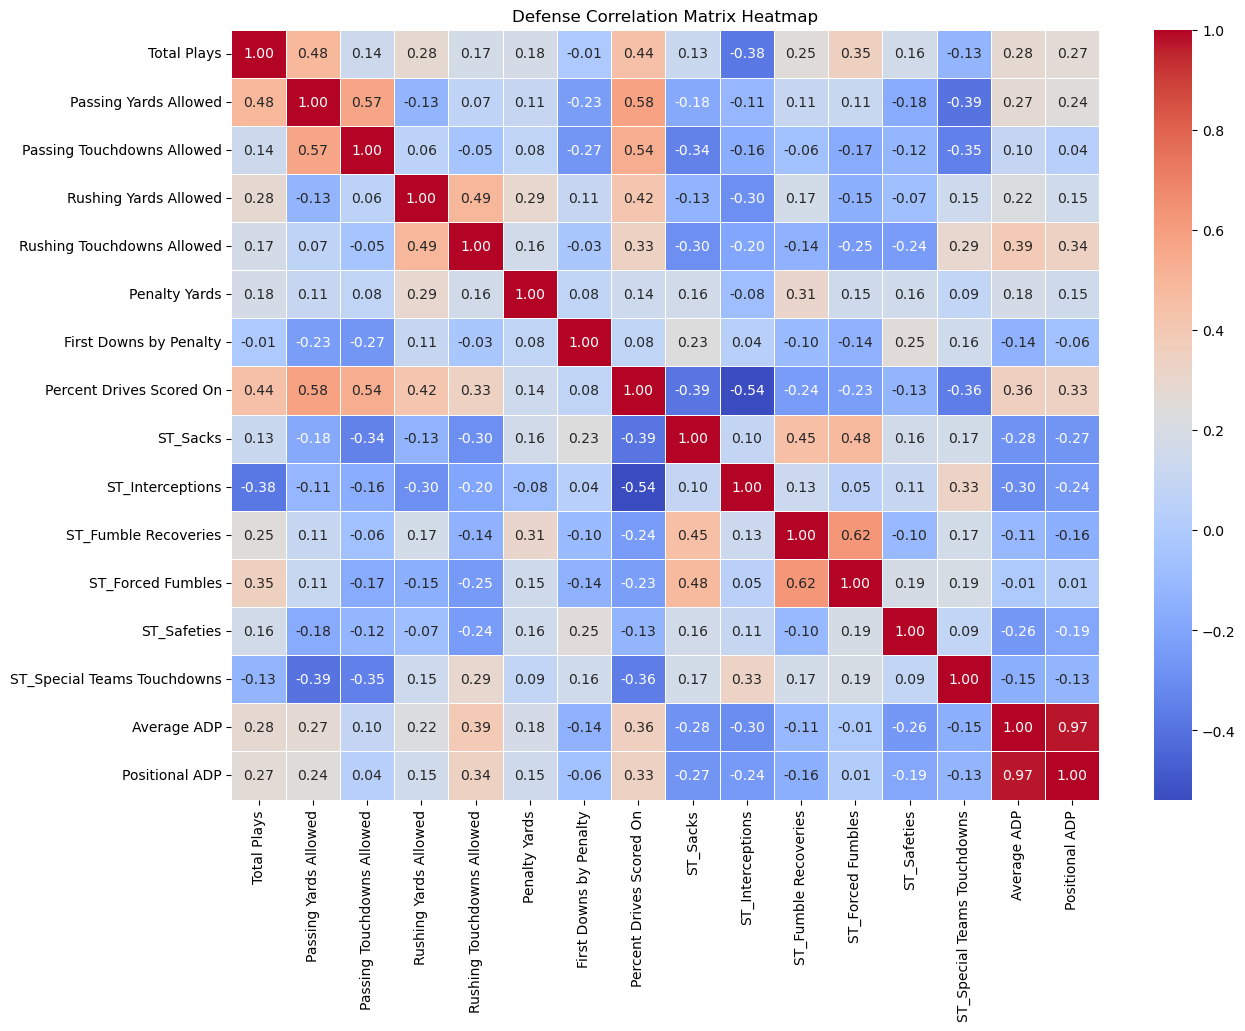

In [40]:
correlation_matrix_defense = df_defense[vif_columns_defense].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_defense, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Defense Correlation Matrix Heatmap")
plt.show()


In [75]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = pd.read_csv("2023_finalized_data.csv") 
df1['total_passing'] = df1['Passing Yards'] * df1['Passing Touchdowns']
df1['touchdowns_allowed'] = df1['Passing Touchdowns Allowed'] + df1['Rushing Touchdowns Allowed']
df1['Receptions*Yards'] = df1['Receptions'] + df1['Receiving Yards']
df1['yards*carries'] = df1['Rushing Yards'] + df1['Rushing Attempts']




df1.drop(columns=["ESPN ADP", "RTSports ADP", "Sleeper ADP", "NFL ADP", "Rushing Attempts", "Field Goals Attempted 0-39", "Field Goals Attempted 40-49", "Field Goals Made 50+", "Field Goals Attempted 50+", "Extra Points Attempted", "Total Yards Allowed", "Passing Yards Allowed", "Rushing Yards Allowed", "ST_Fumble Recoveries", "Fantasy Points From Points", "Percent Drives Takeaway", "First Downs Allowed", "Penalties Committed", "Passing Yards", "Passing Touchdowns", "Receptions", "Passing Attempts", "Rushing Attempts", "Targets", "Team", "Player Name", "Position", "Season", "Passing Completions", "PPR Fantasy Points Scored", "Standard Fantasy Points Scored", "Field Goals Made 0-39", "Field Goals Made 40-49",  "Total Plays", "Percent Drives Scored On", "ST_Forced Fumbles", "Penalty Yards", "First Downs by Penalty", "ST_Sacks", "Passing Touchdowns Allowed", "Rushing Touchdowns Allowed", "Takeaways", "Field Goals Attempted", "Receiving Yards", "Rushing Yards"], inplace=True)
df1 = df1.fillna(0)

X = df1
X = sm.add_constant(X)  



vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)




                        Feature         VIF
0                         const  104.437795
1                           Age    4.324487
2                  Games Played    1.574861
3                 Games Started    4.797876
4          Interceptions Thrown    4.521729
5            Rushing Touchdowns    3.673213
6          Receiving Touchdowns    3.793362
7                       Fumbles    2.502071
8              Field Goals Made    7.466208
9             Extra Points Made    7.196350
10             ST_Interceptions    8.669392
11                  ST_Safeties    1.551108
12  ST_Special Teams Touchdowns    3.890372
13                          XP2    1.081818
14                  Average ADP    2.449232
15               Positional ADP    1.607937
16                total_passing    3.619989
17           touchdowns_allowed    9.100642
18             Receptions*Yards    6.231111
19                yards*carries    4.378827
